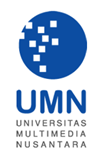
<center>
    <h3>UJIAN TENGAH SEMESTER GENAP TAHUN AKADEMIK 2022/2023</h3>
    <h3>PROGRAM STUDI INFORMATIKA</h3>
    <h3>FAKULTAS TEKNIK DAN INFORMATIKA</h3>
    <h3>UNIVERSITAS MULTIMEDIA NUSANTARA</h3>
</center>

---

<b>Petunjuk:</b>
<ul>
    <li>Gunakan file template jawaban UTS ini untuk <b>SOAL B</b></li>
    <li>Setiap butir pertanyaan memiliki bobot penilaiannya masing-masing</li>
    <li>Usahakan untuk mengerjakan setiap butir pertanyaan sesuai dengan perintah yang diberikan dan di tempat yang disediakan</li>
    <li>Tulis nama dan NIM Anda di dalam blok <i>cell</i> di bawah ini! Tampilkan dengan perintah <i>print</i>!</li>
</ul>

In [1]:
# input nama dan nim Anda di sini
nama = 'Arvin Winardi'
nim = '00000058607'
print(f'Nama:\n  {nama}')
print(f'NIM:\n  {nim}')

Nama:
  Arvin Winardi
NIM:
  00000058607


<u><h3>SOAL 1 (Total Bobot: 20%)</h3></u>
Gunakan metode Gauss-Seidel (metode iterative) untuk mendapatkan solusi dari sistem persamaan linear berikut dengan nilai threshold $𝜖=0.01$:<br>
$ 4𝑥_1+𝑥_2−2𝑥_3=2 $<br>
$ −2𝑥_1−8𝑥_2-7𝑥_3=5 $<br>
$ 𝑥_1+𝑥_2+8x_3=−3 $<br>
Jangan lupa untuk mengecek kondisi kekonvergenan terlebih dahulu dengan melihat apakah matriks dominan secara diagonal atau tidak?

In [2]:
# import seluruh libraries yang dibutuhkan
import numpy as np

# INPUT THE MATRIX
A = np.array([[4, 1, -2], [-2, -8, -7], [1, 1, 8]])
b = np.array([2, 5, -3])


# check the condition
epsilon = 0.01
def is_diagonally_dominant(matrix):
    diagonal = np.diag(np.abs(matrix)) 
    sum_of_rows = np.sum(np.abs(matrix), axis=1) - diagonal
    return np.all(diagonal >= sum_of_rows)

# inisialisasi data awal
x = [0,0,0]
# metode Gauss-Seidel
if(is_diagonally_dominant(np.array(A)) == True):
    print("Metode Gauss-Seidel dapat digunakan")
for i in range(1000):
    # Menyimpan nilai x pada iterasi sebelumnya
    x_prev = x.copy()
    
    # Menghitung nilai x pada iterasi saat ini
    for j in range(len(x)):
        # Menghitung nilai xi pada iterasi saat ini dengan persamaan Gauss-Seidel
        sigma = sum(A[j][k] * x[k] for k in range(len(x)) if k != j)
        x[j] = (1 / A[j][j]) * (b[j] - sigma)
    
    # Error Checking
    error = max(abs((x[j] - x_prev[j]) / x[j]) for j in range(len(x)) if x[j] != 0)
    
    # Error Checking
    if error < epsilon:
        break

# Print Solution
print("Solusi sistem persamaan linear:")
for i in range(len(x)):
    print(f"x{i+1} = {x[i]:.2f}")



Solusi sistem persamaan linear:
x1 = 0.41
x2 = -0.40
x3 = -0.38


<u><h3>SOAL 2 (Total Bobot: 20%)</h3></u>
<h3>Soal 2 A (Bobot: 10%)</h3>
Carilah nilai eigen dan vektor eigen untuk matrix
$$\begin{bmatrix} 2 & 1 & 2 \\ 1 & 3 & 2 \\ 2 & 4 & 1 \end{bmatrix}$$
dengan menggunakan Power method. Anda bisa mencoba dengan vektor awal [1, 0, 0] dan 10 kali iterasi.

In [3]:
# Finding max Eigenvalue and Eigenvector (Bobot maks: 10%)

import numpy as np

# Mendefinisikan matriks
A = np.array([[2, 1, 2], [1, 3, 2], [2, 4, 1]])

# Inisialisasi data awal
v = np.array([1, 0, 0])

# define a normalize function
def normalize(x):
    fac = abs(x).max()
    x_n = x / x.max()
    return fac, x_n

# define power method
def eigen_powermethod(initial_vector, matrix, iterator):
    for i in range(iterator):
        initial_vector = matrix @ initial_vector
        lambda_1, initial_vector = normalize(initial_vector)
    return lambda_1, initial_vector

# eigenvalue dan eigenvector
eigenvalue, eigenvector = eigen_powermethod(v, A, 10)

# Mencetak nilai eigen dan vektor eigen
print("Nilai eigen terbesar: ", eigenvalue)
print("Vektor eigen: ", eigenvector)



Nilai eigen terbesar:  6.029103563824766
Vektor eigen:  [0.71918796 0.8976846  1.        ]


<h3>Soal 2 B (Bobot: 10%)</h3>
Carilah seluruh nilai eigen dan vektor eigen untuk permasalahan di Soal 2 A dengan menggunakan <i>built-in function</i> <b>eig</b> dari numpy.linalg!

In [4]:
# Finding all eigenvalues and eigenvectors using built-in function eig (Bobot maks: 10%)
# import seluruh libraries yang dibutuhkan
import numpy as np

# tampilkan seluruh eigenvalues dan eigenvectors dengan fungsi 'eig'
A = np.array([[2, 1, 2], [1, 3, 2], [2, 4, 1]])
eigenvalues, eigenvectors = np.linalg.eig(A)

print("Nilai eigen: ", eigenvalues)
print("Vektor eigen: ", eigenvectors)


Nilai eigen:  [ 6.02911192  1.33625596 -1.36536788]
Vektor eigen:  [[-0.47185751 -0.88987496 -0.42138925]
 [-0.58896955  0.45081499 -0.29617582]
 [-0.65609859  0.0699171   0.85715284]]


<u><h3>SOAL 3 (Total Bobot: 20%)</h3></u>
Misal diberikan data buatan yang diperoleh dengan formulasi $ 𝑥=𝑛𝑝.𝑙𝑖𝑛𝑠𝑝𝑎𝑐𝑒(0, 1, 101) $ dan $ 𝑦=10*𝑥+𝑛𝑝.𝑟𝑎𝑛𝑑𝑜𝑚.𝑟𝑎𝑛𝑑𝑜𝑚(𝑙𝑒𝑛(𝑥)) $.<br>
Gunakan metode Least Squares Regression (LSR) dengan fungsi estimasi yang didefinisikan sebagai $ 𝑦 ̂=𝛼_1 𝑥+ 𝛼_2 $.<br>
Bandingkan hasilnya dengan metode <b>Pseudo-inverse</b> dan <i>built-in function</i> <b>lstsq</b> dari numpy.<br>
Plot titik-titik data yang dihasilkan dari formulasi tersebut bersama dengan hasil pendekatan LSR-nya.

[[100.0790866 ]
 [  0.46414053]]
[[100.0790866 ]
 [  0.46414053]]
[[100.0790866 ]
 [  0.46414053]]


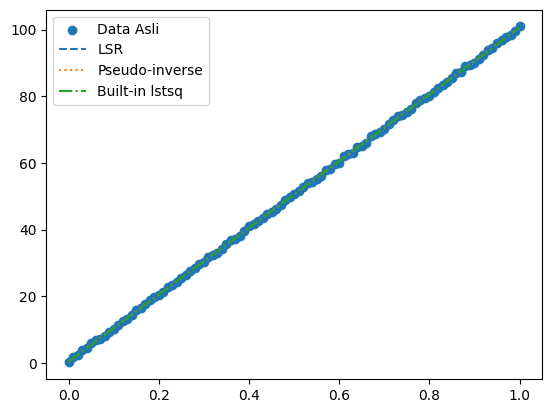

In [5]:
# import seluruh libraries yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt

# bangun titik-titik data x dan y 
x = np.linspace(0, 1, 101)
y = 100 * x + np.random.rand(len(x))

# bangun matrix A dan ubah y menjadi vektor kolom 

A = np.vstack([x, np.ones(len(x))]).T
y = y[:, np.newaxis]
# Direct Least Square Regression 
alpha1 = np.linalg.inv(A.T @ A) @ A.T @ y
print(alpha1)

# Pseudo-inverse method 
pinv = np.linalg.pinv(A)
alpha2 = pinv @ y
print(alpha2)

# Built-in lstsq dari numpy 
alpha3 = np.linalg.lstsq(A, y, rcond=None)[0]
print(alpha3)
# Plot hasil 
plt.scatter(x, y, label="Data Asli")
plt.plot(x, A @ alpha1, label="LSR", linestyle='dashed')
plt.plot(x, A @ alpha2, label="Pseudo-inverse", linestyle='dotted')
plt.plot(x, A @ alpha3, label="Built-in lstsq", linestyle='dashdot')

# sajikan plot hasil
plt.legend()
plt.show()

<u><h3>SOAL 4 (Total Bobot: 20%)</h3></u>
<h3>Soal 4 A (Bobot: 10%)</h3>
Buat sebuah definisi fungsi <b>my_lagrange(x, y, X)</b> dimana output Y adalah hasil interpolasi Lagrange dari titik-titik data yang ada di x dan y yang dihitung terhadap data-data di X.<br>
Petunjuk: Gunakan <i>nested for-loop</i>, dimana <i>inner for-loop</i> digunakan untuk menghitung hasil kali dari Lagrange basis polynomial dan <i>outer for-loop</i> digunakan untuk menghitung jumlahan dari Lagrange polynomial. Jangan menggunakan fungsi lagrange yang tersedia di scipy.

In [6]:
# my_lagrange function (Bobot maks: 10%)

# definisi fungsi my_lagrange(x,y,X)
def my_lagrange(x, y, X):
    n = len(x)
    m = len(X)
    Y = np.zeros(m)
    
    for j in range(m):
        for i in range(n):
            L = 1
            for k in range(n):
                if k != i:
                    L *= (X[j]-x[k])/(x[i]-x[k])
            Y[j] += L*y[i]
    
    return Y



<h3>Soal 4 B (Bobot: 10%)</h3>
Dengan menggunakan fungsi yang telah didefinisikan pada Soal 4 A dan titik-titik data dummy yang didefinisikan sebagai berikut<br>
$ x = [0, 2, 4, 6, 8] $<br>
$ y = [2, 7, 3, -1, 1] $<br>
X adalah nilai-nilai di sumbu X mulai dari titik awal x hingga titik akhir x yang dibagi menjadi 100 bagian sama panjang<br>
Sajikan plot tiap titik data dan interpolasi Lagrange yang dihasilkan!

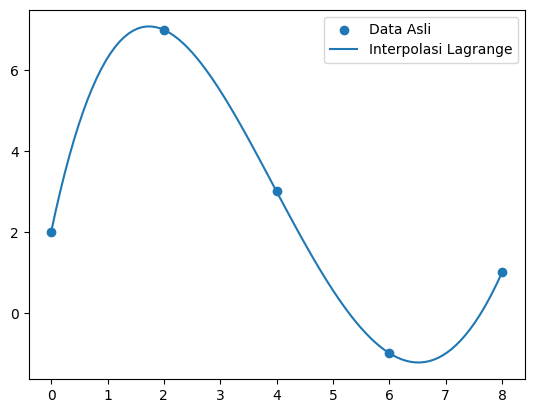

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def my_lagrange(x, y, X):
    n = len(x)
    m = len(X)
    Y = np.zeros(m)
    
    for j in range(m):
        for i in range(n):
            L = 1
            for k in range(n):
                if k != i:
                    L *= (X[j]-x[k])/(x[i]-x[k])
            Y[j] += L*y[i]
    
    return Y

# bangun titik-titik data x, y, dan X (Bobot: 5%)
x = [0,2,4,6,8]
y = [2,7,3,-1,1]

X = np.linspace(x[0], x[-1], 100)

# Hitung nilai interpolasi menggunakan my_lagrange
Y = my_lagrange(x, y, X)

# Plot hasil (Bobot maks: 5%)
plt.scatter(x, y, label="Data Asli")
plt.plot(X, Y, label="Interpolasi Lagrange")
plt.legend()
plt.show()